In [1]:
# Import necesscary packages.
import os

import earthpy as et
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
import geopandas as gpd
import folium
import seaborn as sns
from scipy.stats import linregress
from datetime import datetime, timedelta
from matplotlib.lines import Line2D
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import linregress
import calendar

In [2]:
# Set working directory.
temp_path = os.path.join(
    et.io.HOME,
    'Masters')
# Check if the path exists, if not create it.
if os.path.exists(temp_path):
    os.chdir(temp_path)
else:
    print('This path does not exist')
os.getcwd()

'/Users/rebeccamchugh/Masters'

In [3]:
# Import csv files for temperature data.
temp_dir = glob(os.path.join('air-temp-raw-data-2022-2023', '*'))
temp_dir

['air-temp-raw-data-2022-2023/tree_abundance .csv',
 'air-temp-raw-data-2022-2023/data_2022.csv',
 'air-temp-raw-data-2022-2023/data_2023.csv',
 'air-temp-raw-data-2022-2023/alltemps_2023',
 'air-temp-raw-data-2022-2023/variables.csv',
 'air-temp-raw-data-2022-2023/ground_veg_15m.csv',
 'air-temp-raw-data-2022-2023/sensor_gps.csv']

In [4]:
# Import data for 2022 
# Import data for 2023 
csv_data_2022 = pd.read_csv('air-temp-raw-data-2022-2023/data_2022.csv')
csv_data_2022['date_time'] = pd.to_datetime(csv_data_2022['date_time'])
csv_data_2022

# Drop rows with NaN values in the 'temp_fahrenheit' column
csv_data_2022 = csv_data_2022.dropna(subset=['temp_fahrenheit'])
csv_data_2022


,date_time,temp_fahrenheit,Time of Day,sensor_number
0,2022-05-26 08:00:00,60.188,Day,sensor_001
1,2022-05-26 08:05:00,63.806,Day,sensor_001
2,2022-05-26 08:10:00,64.112,Day,sensor_001
4,2022-05-26 08:15:00,63.734,Day,sensor_001
5,2022-05-26 08:20:00,62.960,Day,sensor_001
...,...,...,...,...
1637235,2022-11-07 09:30:00,43.664,Day,sensor_043
1637236,2022-11-07 09:35:00,44.420,Day,sensor_043
1637237,2022-11-07 09:40:00,44.744,Day,sensor_043
1637238,2022-11-07 09:45:00,44.348,Day,sensor_043


In [5]:
# 2023 data didnt have all sensors??
# new2023 = pd.read_csv('air-temp-raw-data-2022-2023/alltemps_2023')

# # Daily mean 2023
# # Convert 'date_time' to a datetime object
# new2023['date_time'] = pd.to_datetime(new2023['date_time'])

# # Calculate the daily max temperature for each sensor, time of day, and day
# new2023['daily_mean_temp'] = new2023.groupby(['sensor_number', 'Time of Day', new2023['date_time'].dt.date])['temp_fahrenheit'].transform('mean')

# # Print the DataFrame with the new 'daily_mean_temp' column
# new2023
# # Monthly mean/mean 2023
# # Calculate the daily maximum temperature for each sensor and time of day
# new2023['month'] = csv_data_2023['date_time'].dt.month
# new2023.groupby(['month', 'sensor_number', 'Time of Day', 'daily_mean_temp'])

# # Calculate the monthly mean temperature for each sensor and time of day
# # Calculate the monthly mean temperature for each sensor and time of day
# monthly_mean_temperatures = new2023.groupby(['month', 'sensor_number', 'Time of Day'])['daily_mean_temp'].mean().reset_index()

# # Merge the two DataFrames based on the common columns (month, sensor_number, and Time of Day)
# monthly_mean_2023_new = pd.merge(csv_data_2023, monthly_mean_temperatures, on=['month', 'sensor_number', 'Time of Day'], suffixes=('_', '_monthly_mean'))

# monthly_mean_2023_new


In [6]:
# Import data for 2023 
csv_data_2023 = pd.read_csv('air-temp-raw-data-2022-2023/data_2023.csv')
csv_data_2023['date_time'] = pd.to_datetime(csv_data_2023['date_time'])
csv_data_2023

,date_time,temp_fahrenheit,Time of Day,sensor_number
0,2023-05-17 00:00:00,65.51,Night,sensor_001
1,2023-05-17 00:05:00,65.28,Night,sensor_001
2,2023-05-17 00:10:00,65.12,Night,sensor_001
3,2023-05-17 00:15:00,64.89,Night,sensor_001
4,2023-05-17 00:20:00,64.81,Night,sensor_001
...,...,...,...,...
795328,2023-07-27 11:15:00,88.20,Day,sensor_048b
795329,2023-07-27 11:20:00,88.90,Day,sensor_048b
795330,2023-07-27 11:25:00,88.90,Day,sensor_048b
795331,2023-07-27 11:30:00,88.30,Day,sensor_048b


In [7]:
# Get the daily max 

# Assuming you have a DataFrame called csv_data_2022
# Replace 'csv_data_2022' with your actual DataFrame name

# Convert 'date_time' to a datetime object
csv_data_2022['date_time'] = pd.to_datetime(csv_data_2022['date_time'])

# Calculate the daily max temperature for each sensor, time of day, and day
csv_data_2022['daily_max_temp'] = csv_data_2022.groupby(['sensor_number', 'Time of Day', csv_data_2022['date_time'].dt.date])['temp_fahrenheit'].transform('max')

# Print the DataFrame with the new 'daily_max_temp' column
csv_data_2022

,date_time,temp_fahrenheit,Time of Day,sensor_number,daily_max_temp
0,2022-05-26 08:00:00,60.188,Day,sensor_001,83.894
1,2022-05-26 08:05:00,63.806,Day,sensor_001,83.894
2,2022-05-26 08:10:00,64.112,Day,sensor_001,83.894
4,2022-05-26 08:15:00,63.734,Day,sensor_001,83.894
5,2022-05-26 08:20:00,62.960,Day,sensor_001,83.894
...,...,...,...,...,...
1637235,2022-11-07 09:30:00,43.664,Day,sensor_043,44.744
1637236,2022-11-07 09:35:00,44.420,Day,sensor_043,44.744
1637237,2022-11-07 09:40:00,44.744,Day,sensor_043,44.744
1637238,2022-11-07 09:45:00,44.348,Day,sensor_043,44.744


In [8]:
# Calculate the daily maximum temperature for each sensor and time of day
csv_data_2022['month'] = csv_data_2022['date_time'].dt.month
csv_data_2022.groupby(['month', 'sensor_number', 'Time of Day', 'daily_max_temp'])

# Calculate the monthly mean temperature for each sensor and time of day
# Calculate the monthly mean temperature for each sensor and time of day
monthly_mean_temperatures = csv_data_2022.groupby(['month', 'sensor_number', 'Time of Day'])['daily_max_temp'].mean().reset_index()

# Merge the two DataFrames based on the common columns (month, sensor_number, and Time of Day)
monthly_max_2022 = pd.merge(csv_data_2022, monthly_mean_temperatures, on=['month', 'sensor_number', 'Time of Day'], suffixes=('_', '_monthly_mean'))

monthly_max_2022


,date_time,temp_fahrenheit,Time of Day,sensor_number,daily_max_temp_,month,daily_max_temp_monthly_mean
0,2022-05-26 08:00:00,60.188,Day,sensor_001,83.894,5,74.966000
1,2022-05-26 08:05:00,63.806,Day,sensor_001,83.894,5,74.966000
2,2022-05-26 08:10:00,64.112,Day,sensor_001,83.894,5,74.966000
3,2022-05-26 08:15:00,63.734,Day,sensor_001,83.894,5,74.966000
4,2022-05-26 08:20:00,62.960,Day,sensor_001,83.894,5,74.966000
...,...,...,...,...,...,...,...
1545182,2022-11-07 09:30:00,43.664,Day,sensor_043,44.744,11,56.619496
1545183,2022-11-07 09:35:00,44.420,Day,sensor_043,44.744,11,56.619496
1545184,2022-11-07 09:40:00,44.744,Day,sensor_043,44.744,11,56.619496
1545185,2022-11-07 09:45:00,44.348,Day,sensor_043,44.744,11,56.619496


In [9]:
# Daily max 2023 
# Convert 'date_time' to a datetime object
csv_data_2023['date_time'] = pd.to_datetime(csv_data_2023['date_time'])

# Calculate the daily max temperature for each sensor, time of day, and day
csv_data_2023['daily_max_temp'] = csv_data_2023.groupby(['sensor_number', 'Time of Day', csv_data_2023['date_time'].dt.date])['temp_fahrenheit'].transform('max')

# Print the DataFrame with the new 'daily_max_temp' column
csv_data_2023

,date_time,temp_fahrenheit,Time of Day,sensor_number,daily_max_temp
0,2023-05-17 00:00:00,65.51,Night,sensor_001,65.51
1,2023-05-17 00:05:00,65.28,Night,sensor_001,65.51
2,2023-05-17 00:10:00,65.12,Night,sensor_001,65.51
3,2023-05-17 00:15:00,64.89,Night,sensor_001,65.51
4,2023-05-17 00:20:00,64.81,Night,sensor_001,65.51
...,...,...,...,...,...
795328,2023-07-27 11:15:00,88.20,Day,sensor_048b,95.70
795329,2023-07-27 11:20:00,88.90,Day,sensor_048b,95.70
795330,2023-07-27 11:25:00,88.90,Day,sensor_048b,95.70
795331,2023-07-27 11:30:00,88.30,Day,sensor_048b,95.70


In [10]:
# Monthly max/mean 2023
# Calculate the daily maximum temperature for each sensor and time of day
csv_data_2023['month'] = csv_data_2023['date_time'].dt.month
csv_data_2023.groupby(['month', 'sensor_number', 'Time of Day', 'daily_max_temp'])

# Calculate the monthly mean temperature for each sensor and time of day
# Calculate the monthly mean temperature for each sensor and time of day
monthly_mean_temperatures = csv_data_2023.groupby(['month', 'sensor_number', 'Time of Day'])['daily_max_temp'].mean().reset_index()

# Merge the two DataFrames based on the common columns (month, sensor_number, and Time of Day)
monthly_max_2023 = pd.merge(csv_data_2023, monthly_mean_temperatures, on=['month', 'sensor_number', 'Time of Day'], suffixes=('_', '_monthly_mean'))

monthly_max_2023


,date_time,temp_fahrenheit,Time of Day,sensor_number,daily_max_temp_,month,daily_max_temp_monthly_mean
0,2023-05-17 00:00:00,65.51,Night,sensor_001,65.51,5,61.256667
1,2023-05-17 00:05:00,65.28,Night,sensor_001,65.51,5,61.256667
2,2023-05-17 00:10:00,65.12,Night,sensor_001,65.51,5,61.256667
3,2023-05-17 00:15:00,64.89,Night,sensor_001,65.51,5,61.256667
4,2023-05-17 00:20:00,64.81,Night,sensor_001,65.51,5,61.256667
...,...,...,...,...,...,...,...
795328,2023-07-27 11:15:00,88.20,Day,sensor_048b,95.70,7,89.153115
795329,2023-07-27 11:20:00,88.90,Day,sensor_048b,95.70,7,89.153115
795330,2023-07-27 11:25:00,88.90,Day,sensor_048b,95.70,7,89.153115
795331,2023-07-27 11:30:00,88.30,Day,sensor_048b,95.70,7,89.153115


In [11]:
# Daily mean 2022 
# Convert 'date_time' to a datetime object
csv_data_2022['date_time'] = pd.to_datetime(csv_data_2022['date_time'])

# Calculate the daily max temperature for each sensor, time of day, and day
csv_data_2022['daily_mean_temp'] = csv_data_2022.groupby(['sensor_number', 'Time of Day', csv_data_2022['date_time'].dt.date])['temp_fahrenheit'].transform('mean')

# Print the DataFrame with the new 'daily_mean_temp' column
csv_data_2022

,date_time,temp_fahrenheit,Time of Day,sensor_number,daily_max_temp,month,daily_mean_temp
0,2022-05-26 08:00:00,60.188,Day,sensor_001,83.894,5,76.098821
1,2022-05-26 08:05:00,63.806,Day,sensor_001,83.894,5,76.098821
2,2022-05-26 08:10:00,64.112,Day,sensor_001,83.894,5,76.098821
4,2022-05-26 08:15:00,63.734,Day,sensor_001,83.894,5,76.098821
5,2022-05-26 08:20:00,62.960,Day,sensor_001,83.894,5,76.098821
...,...,...,...,...,...,...,...
1637235,2022-11-07 09:30:00,43.664,Day,sensor_043,44.744,11,30.024596
1637236,2022-11-07 09:35:00,44.420,Day,sensor_043,44.744,11,30.024596
1637237,2022-11-07 09:40:00,44.744,Day,sensor_043,44.744,11,30.024596
1637238,2022-11-07 09:45:00,44.348,Day,sensor_043,44.744,11,30.024596


In [12]:
# Monthly mean/mean 2022
# Calculate the daily maximum temperature for each sensor and time of day
csv_data_2022['month'] = csv_data_2022['date_time'].dt.month
csv_data_2022.groupby(['month', 'sensor_number', 'Time of Day', 'daily_max_temp'])

# Calculate the monthly mean temperature for each sensor and time of day
# Calculate the monthly mean temperature for each sensor and time of day
monthly_mean_temperatures = csv_data_2022.groupby(['month', 'sensor_number', 'Time of Day'])['daily_mean_temp'].mean().reset_index()

# Merge the two DataFrames based on the common columns (month, sensor_number, and Time of Day)
monthly_mean_2022 = pd.merge(csv_data_2022, monthly_mean_temperatures, on=['month', 'sensor_number', 'Time of Day'], suffixes=('_', '_monthly_mean'))

monthly_mean_2022


,date_time,temp_fahrenheit,Time of Day,sensor_number,daily_max_temp,month,daily_mean_temp_,daily_mean_temp_monthly_mean
0,2022-05-26 08:00:00,60.188,Day,sensor_001,83.894,5,76.098821,65.761617
1,2022-05-26 08:05:00,63.806,Day,sensor_001,83.894,5,76.098821,65.761617
2,2022-05-26 08:10:00,64.112,Day,sensor_001,83.894,5,76.098821,65.761617
3,2022-05-26 08:15:00,63.734,Day,sensor_001,83.894,5,76.098821,65.761617
4,2022-05-26 08:20:00,62.960,Day,sensor_001,83.894,5,76.098821,65.761617
...,...,...,...,...,...,...,...,...
1545182,2022-11-07 09:30:00,43.664,Day,sensor_043,44.744,11,30.024596,43.897084
1545183,2022-11-07 09:35:00,44.420,Day,sensor_043,44.744,11,30.024596,43.897084
1545184,2022-11-07 09:40:00,44.744,Day,sensor_043,44.744,11,30.024596,43.897084
1545185,2022-11-07 09:45:00,44.348,Day,sensor_043,44.744,11,30.024596,43.897084


In [13]:
# Daily mean 2023
# Convert 'date_time' to a datetime object
csv_data_2023['date_time'] = pd.to_datetime(csv_data_2023['date_time'])

# Calculate the daily max temperature for each sensor, time of day, and day
csv_data_2023['daily_mean_temp'] = csv_data_2023.groupby(['sensor_number', 'Time of Day', csv_data_2023['date_time'].dt.date])['temp_fahrenheit'].transform('mean')

# Print the DataFrame with the new 'daily_mean_temp' column
csv_data_2023

,date_time,temp_fahrenheit,Time of Day,sensor_number,daily_max_temp,month,daily_mean_temp
0,2023-05-17 00:00:00,65.51,Night,sensor_001,65.51,5,59.895729
1,2023-05-17 00:05:00,65.28,Night,sensor_001,65.51,5,59.895729
2,2023-05-17 00:10:00,65.12,Night,sensor_001,65.51,5,59.895729
3,2023-05-17 00:15:00,64.89,Night,sensor_001,65.51,5,59.895729
4,2023-05-17 00:20:00,64.81,Night,sensor_001,65.51,5,59.895729
...,...,...,...,...,...,...,...
795328,2023-07-27 11:15:00,88.20,Day,sensor_048b,95.70,7,80.083824
795329,2023-07-27 11:20:00,88.90,Day,sensor_048b,95.70,7,80.083824
795330,2023-07-27 11:25:00,88.90,Day,sensor_048b,95.70,7,80.083824
795331,2023-07-27 11:30:00,88.30,Day,sensor_048b,95.70,7,80.083824


In [14]:
# Monthly mean/mean 2023
# Calculate the daily maximum temperature for each sensor and time of day
csv_data_2023['month'] = csv_data_2023['date_time'].dt.month
csv_data_2023.groupby(['month', 'sensor_number', 'Time of Day', 'daily_max_temp'])

# Calculate the monthly mean temperature for each sensor and time of day
# Calculate the monthly mean temperature for each sensor and time of day
monthly_mean_temperatures = csv_data_2023.groupby(['month', 'sensor_number', 'Time of Day'])['daily_mean_temp'].mean().reset_index()

# Merge the two DataFrames based on the common columns (month, sensor_number, and Time of Day)
monthly_mean_2023 = pd.merge(csv_data_2023, monthly_mean_temperatures, on=['month', 'sensor_number', 'Time of Day'], suffixes=('_', '_monthly_mean'))

monthly_mean_2023

,date_time,temp_fahrenheit,Time of Day,sensor_number,daily_max_temp,month,daily_mean_temp_,daily_mean_temp_monthly_mean
0,2023-05-17 00:00:00,65.51,Night,sensor_001,65.51,5,59.895729,56.006604
1,2023-05-17 00:05:00,65.28,Night,sensor_001,65.51,5,59.895729,56.006604
2,2023-05-17 00:10:00,65.12,Night,sensor_001,65.51,5,59.895729,56.006604
3,2023-05-17 00:15:00,64.89,Night,sensor_001,65.51,5,59.895729,56.006604
4,2023-05-17 00:20:00,64.81,Night,sensor_001,65.51,5,59.895729,56.006604
...,...,...,...,...,...,...,...,...
795328,2023-07-27 11:15:00,88.20,Day,sensor_048b,95.70,7,80.083824,77.110492
795329,2023-07-27 11:20:00,88.90,Day,sensor_048b,95.70,7,80.083824,77.110492
795330,2023-07-27 11:25:00,88.90,Day,sensor_048b,95.70,7,80.083824,77.110492
795331,2023-07-27 11:30:00,88.30,Day,sensor_048b,95.70,7,80.083824,77.110492


In [15]:
# Daily min 2022 
# Convert 'date_time' to a datetime object
csv_data_2022['date_time'] = pd.to_datetime(csv_data_2022['date_time'])

# Calculate the daily max temperature for each sensor, time of day, and day
csv_data_2022['daily_min_temp'] = csv_data_2022.groupby(['sensor_number', 'Time of Day', csv_data_2022['date_time'].dt.date])['temp_fahrenheit'].transform('min')

# Print the DataFrame with the new 'daily_mean_temp' column
csv_data_2022

,date_time,temp_fahrenheit,Time of Day,sensor_number,daily_max_temp,month,daily_mean_temp,daily_min_temp
0,2022-05-26 08:00:00,60.188,Day,sensor_001,83.894,5,76.098821,60.188
1,2022-05-26 08:05:00,63.806,Day,sensor_001,83.894,5,76.098821,60.188
2,2022-05-26 08:10:00,64.112,Day,sensor_001,83.894,5,76.098821,60.188
4,2022-05-26 08:15:00,63.734,Day,sensor_001,83.894,5,76.098821,60.188
5,2022-05-26 08:20:00,62.960,Day,sensor_001,83.894,5,76.098821,60.188
...,...,...,...,...,...,...,...,...
1637235,2022-11-07 09:30:00,43.664,Day,sensor_043,44.744,11,30.024596,22.658
1637236,2022-11-07 09:35:00,44.420,Day,sensor_043,44.744,11,30.024596,22.658
1637237,2022-11-07 09:40:00,44.744,Day,sensor_043,44.744,11,30.024596,22.658
1637238,2022-11-07 09:45:00,44.348,Day,sensor_043,44.744,11,30.024596,22.658


In [16]:
# Monthly min/mean 2022
# Calculate the daily maximum temperature for each sensor and time of day
csv_data_2022['month'] = csv_data_2022['date_time'].dt.month
csv_data_2022.groupby(['month', 'sensor_number', 'Time of Day', 'daily_min_temp'])

# Calculate the monthly mean temperature for each sensor and time of day
# Calculate the monthly mean temperature for each sensor and time of day
monthly_min_temperatures = csv_data_2022.groupby(['month', 'sensor_number', 'Time of Day'])['daily_min_temp'].mean().reset_index()

# Merge the two DataFrames based on the common columns (month, sensor_number, and Time of Day)
monthly_min_2022 = pd.merge(csv_data_2022, monthly_min_temperatures, on=['month', 'sensor_number', 'Time of Day'], suffixes=('_', '_monthly_mean'))

monthly_min_2022


,date_time,temp_fahrenheit,Time of Day,sensor_number,daily_max_temp,month,daily_mean_temp,daily_min_temp_,daily_min_temp_monthly_mean
0,2022-05-26 08:00:00,60.188,Day,sensor_001,83.894,5,76.098821,60.188,53.671234
1,2022-05-26 08:05:00,63.806,Day,sensor_001,83.894,5,76.098821,60.188,53.671234
2,2022-05-26 08:10:00,64.112,Day,sensor_001,83.894,5,76.098821,60.188,53.671234
3,2022-05-26 08:15:00,63.734,Day,sensor_001,83.894,5,76.098821,60.188,53.671234
4,2022-05-26 08:20:00,62.960,Day,sensor_001,83.894,5,76.098821,60.188,53.671234
...,...,...,...,...,...,...,...,...,...
1545182,2022-11-07 09:30:00,43.664,Day,sensor_043,44.744,11,30.024596,22.658,29.353820
1545183,2022-11-07 09:35:00,44.420,Day,sensor_043,44.744,11,30.024596,22.658,29.353820
1545184,2022-11-07 09:40:00,44.744,Day,sensor_043,44.744,11,30.024596,22.658,29.353820
1545185,2022-11-07 09:45:00,44.348,Day,sensor_043,44.744,11,30.024596,22.658,29.353820


In [17]:
# Daily min 2023
# Convert 'date_time' to a datetime object
csv_data_2023['date_time'] = pd.to_datetime(csv_data_2023['date_time'])

# Calculate the daily max temperature for each sensor, time of day, and day
csv_data_2023['daily_min_temp'] = csv_data_2023.groupby(['sensor_number', 'Time of Day', csv_data_2023['date_time'].dt.date])['temp_fahrenheit'].transform('min')

# Print the DataFrame with the new 'daily_mean_temp' column
csv_data_2023

,date_time,temp_fahrenheit,Time of Day,sensor_number,daily_max_temp,month,daily_mean_temp,daily_min_temp
0,2023-05-17 00:00:00,65.51,Night,sensor_001,65.51,5,59.895729,55.08
1,2023-05-17 00:05:00,65.28,Night,sensor_001,65.51,5,59.895729,55.08
2,2023-05-17 00:10:00,65.12,Night,sensor_001,65.51,5,59.895729,55.08
3,2023-05-17 00:15:00,64.89,Night,sensor_001,65.51,5,59.895729,55.08
4,2023-05-17 00:20:00,64.81,Night,sensor_001,65.51,5,59.895729,55.08
...,...,...,...,...,...,...,...,...
795328,2023-07-27 11:15:00,88.20,Day,sensor_048b,95.70,7,80.083824,56.40
795329,2023-07-27 11:20:00,88.90,Day,sensor_048b,95.70,7,80.083824,56.40
795330,2023-07-27 11:25:00,88.90,Day,sensor_048b,95.70,7,80.083824,56.40
795331,2023-07-27 11:30:00,88.30,Day,sensor_048b,95.70,7,80.083824,56.40


In [18]:
# Monthly min/mean 2023
# Calculate the daily maximum temperature for each sensor and time of day
csv_data_2023['month'] = csv_data_2023['date_time'].dt.month
csv_data_2023.groupby(['month', 'sensor_number', 'Time of Day', 'daily_min_temp'])

# Calculate the monthly mean temperature for each sensor and time of day
monthly_min_temperatures = csv_data_2023.groupby(['month', 'sensor_number', 'Time of Day'])['daily_min_temp'].mean().reset_index()

# Merge the two DataFrames based on the common columns (month, sensor_number, and Time of Day)
monthly_min_2023 = pd.merge(csv_data_2023, monthly_min_temperatures, on=['month', 'sensor_number', 'Time of Day'], suffixes=('_', '_monthly_mean'))

monthly_min_2023


,date_time,temp_fahrenheit,Time of Day,sensor_number,daily_max_temp,month,daily_mean_temp,daily_min_temp_,daily_min_temp_monthly_mean
0,2023-05-17 00:00:00,65.51,Night,sensor_001,65.51,5,59.895729,55.08,52.844667
1,2023-05-17 00:05:00,65.28,Night,sensor_001,65.51,5,59.895729,55.08,52.844667
2,2023-05-17 00:10:00,65.12,Night,sensor_001,65.51,5,59.895729,55.08,52.844667
3,2023-05-17 00:15:00,64.89,Night,sensor_001,65.51,5,59.895729,55.08,52.844667
4,2023-05-17 00:20:00,64.81,Night,sensor_001,65.51,5,59.895729,55.08,52.844667
...,...,...,...,...,...,...,...,...,...
795328,2023-07-27 11:15:00,88.20,Day,sensor_048b,95.70,7,80.083824,56.40,56.982295
795329,2023-07-27 11:20:00,88.90,Day,sensor_048b,95.70,7,80.083824,56.40,56.982295
795330,2023-07-27 11:25:00,88.90,Day,sensor_048b,95.70,7,80.083824,56.40,56.982295
795331,2023-07-27 11:30:00,88.30,Day,sensor_048b,95.70,7,80.083824,56.40,56.982295


In [19]:
sensor_mapping = {
    'sensor_001': '001',
    'sensor_002': '002',
    'sensor_003': '003',
    'sensor_004': '004',
    'sensor_005': '005',
    'sensor_006': '006',
    'sensor_007': '007',
    'sensor_008': '008',
    'sensor_009': '009',
    'sensor_010': '010',
    'sensor_011': '011',
    'sensor_012': '012',
    'sensor_013': '013',
    'sensor_014': '014',
    'sensor_015': '015',
    'sensor_016': '016',
    'sensor_017': '017',
    'sensor_018': '018',
    'sensor_019': '019',
    'sensor_020': '020',
    'sensor_021': '021',
    'sensor_022': '022',
    'sensor_023': '023',
    'sensor_024': '024',
    'sensor_025': '025',
    'sensor_026': '026',
    'sensor_027': '027',
    'sensor_028': '028',
    'sensor_029': '029',
    'sensor_030': '030',
    'sensor_031': '031',
    'sensor_032': '032',
    'sensor_033': '033',
    'sensor_034': '034',
    'sensor_035': '035',
    'sensor_036': '036',
    'sensor_037': '037',
    'sensor_038': '038',
    'sensor_039': '039',
    'sensor_040': '040',
    'sensor_041': '041',
    'sensor_042': '042',
    'sensor_043': '043',
    'sensor_044a': '044a',
    'sensor_044b': '044b',
    'sensor_045a': '045a',
    'sensor_045b': '045b',
    'sensor_046a' : '046a',
    'sensor_046b': '046b',
    'sensor_047a': '047a',
    'sensor_047b': '047b',
    'sensor_045c': '045c',
    'sensor_048a': '048a',
    'sensor_048b': '048b',
    'sensor_044c': '044c',
    'sensor_049a': '049a', 
    'sensor_049b': '049b'
}


In [25]:
# Import other variables 
variables = pd.read_csv('air-temp-raw-data-2022-2023/variables.csv')
# Convert specific columns to float64
columns_to_convert = ['elevation_terrain_m',
                      'slope_terrain_degree',
                      'aspect_terrain_degree',
                      'cc-densiometer-average']
# Define a dictionary to replace specific non-numeric values with NaN
replace_dict = {'#DIV/0!': float('nan')}  # Add more values if needed

# Remove commas and then convert to float64, replacing specific values with NaN
for column in columns_to_convert:
    variables[column] = pd.to_numeric(variables[column].replace(',', '', regex=True).replace(replace_dict))

variables.info() # Check the data types after conversion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             59 non-null     object 
 1   Name                           58 non-null     object 
 2   avg_grass                      53 non-null     float64
 3   avg_forb                       53 non-null     float64
 4   avg_shrub                      53 non-null     float64
 5   avg_bare-ground                53 non-null     float64
 6   avg_a-c-r                      53 non-null     float64
 7   avg_water                      53 non-null     float64
 8   avg_XL-grass                   53 non-null     float64
 9   avg_XL-forb                    53 non-null     float64
 10  avg_XL-shrub                   53 non-null     float64
 11  avg_green                      53 non-null     float64
 12  avg_impervious                 53 non-null     float

In [26]:
# Merge data
# Add "sensor_" prefix to the ID column in variables DataFrame
variables['ID'] = 'sensor_' + variables['ID'].astype(str)

#Merge the two DataFrames on 'sensor_number' and 'ID'
merged_data = pd.merge(monthly_mean_2023, variables, left_on='sensor_number', right_on='ID')

# # Print the merged DataFrame
merged_data

,date_time,temp_fahrenheit,Time of Day,sensor_number,daily_max_temp,month,daily_mean_temp_,daily_mean_temp_monthly_mean,ID,Name,...,Impervious_percent_cover_5m,Impervious_percent_cover_1m,Canopy_percent_cover_100m,Canopy_percent_cover_50m,Canopy_percent_cover_30m,Canopy_percent_cover_10m,Canopy_percent_cover_5m,Canopy_percent_cover_1m,zone,assoc_tree
0,2023-05-17 00:00:00,65.51,Night,sensor_001,65.51,5,59.895729,56.006604,sensor_001,Senior Living Facility,...,0.001,0.0,0.277,0.348,0.305,0.4,0.502,0.612,Residental high 1,NaN
1,2023-05-17 00:05:00,65.28,Night,sensor_001,65.51,5,59.895729,56.006604,sensor_001,Senior Living Facility,...,0.001,0.0,0.277,0.348,0.305,0.4,0.502,0.612,Residental high 1,NaN
2,2023-05-17 00:10:00,65.12,Night,sensor_001,65.51,5,59.895729,56.006604,sensor_001,Senior Living Facility,...,0.001,0.0,0.277,0.348,0.305,0.4,0.502,0.612,Residental high 1,NaN
3,2023-05-17 00:15:00,64.89,Night,sensor_001,65.51,5,59.895729,56.006604,sensor_001,Senior Living Facility,...,0.001,0.0,0.277,0.348,0.305,0.4,0.502,0.612,Residental high 1,NaN
4,2023-05-17 00:20:00,64.81,Night,sensor_001,65.51,5,59.895729,56.006604,sensor_001,Senior Living Facility,...,0.001,0.0,0.277,0.348,0.305,0.4,0.502,0.612,Residental high 1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795328,2023-07-27 11:15:00,88.20,Day,sensor_048b,95.70,7,80.083824,77.110492,sensor_048b,Sports field un-irrigated - E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public,NaN
795329,2023-07-27 11:20:00,88.90,Day,sensor_048b,95.70,7,80.083824,77.110492,sensor_048b,Sports field un-irrigated - E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public,NaN
795330,2023-07-27 11:25:00,88.90,Day,sensor_048b,95.70,7,80.083824,77.110492,sensor_048b,Sports field un-irrigated - E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public,NaN
795331,2023-07-27 11:30:00,88.30,Day,sensor_048b,95.70,7,80.083824,77.110492,sensor_048b,Sports field un-irrigated - E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public,NaN


In [ ]:
# List the columns for which you want to drop rows with missing values
columns_to_check = ['Impervious_percent_cover_50m', 'Canopy_percent_cover_50m']  # Replace with your actual column names

# Drop rows with missing values for the specified columns
merged_data.dropna(subset=columns_to_check, inplace=True)


In [ ]:
# Create separate DataFrames for day and night observations
day_data = merged_data[merged_data['Time of Day'] == 'Day']
night_data = merged_data[merged_data['Time of Day'] == 'Night']

# Create subplots to display scatter plots by month
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Loop through each month (assuming months are from 5 to 10)
for month in range(5, 11):  # Months 5 to 10
    row = (month - 5) // 3  # Adjust the row index
    col = (month - 5) % 3   # Adjust the column index

    # Subset day and night data for the current month
    day_month_data = day_data[day_data['month'] == month]
    night_month_data = night_data[night_data['month'] == month]

    if not day_month_data.empty and not night_month_data.empty:
        print(f"Month {month}, Day Data Shape: {day_month_data.shape}, Night Data Shape: {night_month_data.shape}")

        # Create a scatter plot of Impervious_percent_cover_50m vs. monthly_avg_mean_temp for day observations
        sns.scatterplot(data=day_month_data, x='Impervious_percent_cover_50m', y='daily_max_temp_monthly_mean',
                        ax=axes[row, col], color='blue', label='Day', alpha=0.7)

        # Create a scatter plot of Impervious_percent_cover_50m vs. monthly_avg_mean_temp for night observations
        sns.scatterplot(data=night_month_data, x='Impervious_percent_cover_50m', y='daily_max_temp_monthly_mean',
                        ax=axes[row, col], color='orange', label='Night', alpha=0.7)

        # Calculate and plot linear regression lines using Seaborn's regplot
        day_slope, day_intercept, day_r_value, _, _ = linregress(day_month_data['Impervious_percent_cover_50m'], day_month_data['daily_max_temp_monthly_mean'])
        night_slope, night_intercept, night_r_value, _, _ = linregress(night_month_data['Impervious_percent_cover_50m'], night_month_data['daily_max_temp_monthly_mean'])

        print(f"Month {month}, Day Slope: {day_slope}, Night Slope: {night_slope}")

        sns.regplot(x='Impervious_percent_cover_50m', y='daily_max_temp_monthly_mean', data=day_month_data, ci=None, scatter=False,
                    ax=axes[row, col], label=f'Day - R²: {day_r_value:.2f}', line_kws={'linestyle': '-', 'color': 'blue'})

        sns.regplot(x='Impervious_percent_cover_50m', y='daily_max_temp_monthly_mean', data=night_month_data, ci=None, scatter=False,
                    ax=axes[row, col], label=f'Night - R²: {night_r_value:.2f}', line_kws={'linestyle': '--', 'color': 'orange'})

        axes[row, col].set_title(f'{calendar.month_abbr[month]} 2023')
        axes[row, col].set_xlabel('Impervious Cover per 50 meters(%)')
        axes[row, col].set_ylabel('Monthly Avg Max Temp (°F)')
        axes[row, col].legend()

# Adjust subplot layout
plt.tight_layout()
plt.show()


In [ ]:
# Plots per ground veg measurements 
# import matplotlib
# matplotlib.use('Agg')  # Change the backend
# Custom labels for column names
column_labels = {
    'avg_grass': 'Grass',
    'avg_forb': 'Forb',
    'avg_shrub': 'Shrub',
    'avg_a-c-r': 'Asphat, concrete, or rock',
    'avg_bare-ground': 'Bare Ground',
    'avg_water': 'Water',
    'avg_XL-grass': 'Grass over 0.5 meters',
    'avg_XL-forb': 'Forbs over 0.5 meters',
    'avg_XL-shrub': 'Shrubs 0.5 meters',
    'avg_green' : 'Grass, forbs, and shrubs cover'
}

# Plot veg. data 
def plot_temps_by_cover(merged_data, column_name, month):
    plt.figure(figsize=(12, 6))
    sns.set_style('whitegrid')
    
    # Filter data for the specific month
    month_data = merged_data[merged_data['month'] == month]
    
    # Combine 'Time of Day' and 'sensor_number' to create a unique hue identifier
    month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)
    
    # Define colors for day and night points
    day_color = 'pink'
    night_color = 'green'
    
    # Plot the data using Seaborn
    sns.scatterplot(data=month_data, x=column_name, y='daily_mean_temp_monthly_mean', hue='Time of Day',
                    palette={'Day': day_color, 'Night': night_color})
    
    # Calculate and plot linear regression lines using Seaborn's regplot
    day_data = month_data[month_data['Time of Day'] == 'Day']
    night_data = month_data[month_data['Time of Day'] == 'Night']
    
    day_slope, day_intercept, day_r_value, _, _ = linregress(day_data[column_name], day_data['daily_mean_temp_monthly_mean'])
    night_slope, night_intercept, night_r_value, _, _ = linregress(night_data[column_name], night_data['daily_mean_temp_monthly_mean'])
    
    sns.regplot(data=day_data, x=column_name, y='daily_mean_temp_monthly_mean', ci=None, scatter=False, label=f'Day - R²: {day_r_value:.2f}', line_kws={'linestyle': '-', 'color': day_color})
    sns.regplot(data=night_data, x=column_name, y='daily_mean_temp_monthly_mean', ci=None, scatter=False, label=f'Night - R²: {night_r_value:.2f}', line_kws={'linestyle': '--', 'color': night_color})
    
    # Get the custom label for the column or use the column name
    cover_type_label = column_labels.get(column_name, column_name.replace('%_avg_cover_', '').replace('_', ' ').capitalize())
    
    plt.xlabel(f'Percentage Average {cover_type_label}')
    plt.ylabel('Daily Mean, Monthly Average Temperature (°F)')
    plt.title(f'Monthly Temperatures vs. Percentage Average {cover_type_label} in 50-meters - {calendar.month_name[month]} 2023')
    
    # Add linear regression equations in the legend
    legend = plt.legend(title='', loc='upper left')
    legend.texts[0].set_text(f'Day y = {day_slope:.2f}x + {day_intercept:.2f}')
    legend.texts[1].set_text(f'Night y = {night_slope:.2f}x + {night_intercept:.2f}')
    
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.xlim(month_data[column_name].min() - 5, month_data[column_name].max() + 5)
    plt.xlim(0, 100)  # Set x-axis limits to 0-100
    plt.ylim(50, 100)  # Set y-axis limits to 50-110
    plt.show()

# List of months for which you want to create plots
months_to_plot = [5, 6, 7]  # Adjust this list as needed

# List of column names to plot
columns_to_plot = [
    'avg_grass',
    'avg_forb',
    'avg_shrub',
    'avg_a-c-r',
    'avg_bare-ground',
    'avg_water',
    'avg_XL-grass',
    'avg_XL-forb',
    'avg_XL-shrub',
    'avg_green'
]

# ... (previous code)

for column_name in columns_to_plot:
    for month in months_to_plot:
        plot_temps_by_cover(merged_data, column_name, month)
        plt.savefig(f'./{column_name}_{calendar.month_abbr[month]}.png', bbox_inches='tight')  # Save in the current directory
        #plt.close()  # Close the current figure to avoid overlap in subsequent loops

In [ ]:
# Canopy and Impervious on the same plot 

# Assuming you have separate DataFrames for day and night observations
day_data = merged_data[merged_data['Time of Day'] == 'Day']
night_data = merged_data[merged_data['Time of Day'] == 'Night']

# Create subplots to display scatter plots by month
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Initialize an empty list to collect legend handles and labels
legend_handles = []

# Loop through each month (assuming months are from 5 to 10)
for month in range(5, 11):  # Months 5 to 10
    row = (month - 5) // 3  # Adjust the row index
    col = (month - 5) % 3   # Adjust the column index

    # Subset day and night data for the current month
    day_month_data = day_data[day_data['month'] == month]
    night_month_data = night_data[night_data['month'] == month]

    if not day_month_data.empty and not night_month_data.empty:
        print(f"Month {month}, Day Data Shape: {day_month_data.shape}, Night Data Shape: {night_month_data.shape}")

        # Create a scatter plot of Impervious_percent_cover_50m vs. daily_mean_temp_monthly_mean for day observations
        sns.scatterplot(data=day_month_data, x='Impervious_percent_cover_50m', y='daily_mean_temp_monthly_mean',
                        ax=axes[row, col], color='lightblue', label='Day - Impervious', alpha=0.7)

        sns.scatterplot(data=day_month_data, x='Canopy_percent_cover_50m', y='daily_mean_temp_monthly_mean',
                        ax=axes[row, col], color='darkgreen', label='Day - Canopy', alpha=0.7)

        # Create a scatter plot of Impervious_percent_cover_50m vs. daily_mean_temp_monthly_mean for night observations
        sns.scatterplot(data=night_month_data, x='Impervious_percent_cover_50m', y='daily_mean_temp_monthly_mean',
                        ax=axes[row, col], color='lightblue', label='Night - Impervious', alpha=0.7)

        sns.scatterplot(data=night_month_data, x='Canopy_percent_cover_50m', y='daily_mean_temp_monthly_mean',
                        ax=axes[row, col], color='darkgreen', label='Night - Canopy', alpha=0.7)

        # Calculate and plot linear regression lines using Seaborn's regplot for Impervious cover
        day_slope_imp, day_intercept_imp, day_r_value_imp, _, _ = linregress(day_month_data['Impervious_percent_cover_50m'], day_month_data['daily_mean_temp_monthly_mean'])
        night_slope_imp, night_intercept_imp, night_r_value_imp, _, _ = linregress(night_month_data['Impervious_percent_cover_50m'], night_month_data['daily_mean_temp_monthly_mean'])

        # Calculate and plot linear regression lines using Seaborn's regplot for Canopy cover
        day_slope_canopy, day_intercept_canopy, day_r_value_canopy, _, _ = linregress(day_month_data['Canopy_percent_cover_50m'], day_month_data['daily_mean_temp_monthly_mean'])
        night_slope_canopy, night_intercept_canopy, night_r_value_canopy, _, _ = linregress(night_month_data['Canopy_percent_cover_50m'], night_month_data['daily_mean_temp_monthly_mean'])

        print(f"Month {month}, Day Impervious Slope: {day_slope_imp}, Night Impervious Slope: {night_slope_imp}")
        print(f"Month {month}, Day Canopy Slope: {day_slope_canopy}, Night Canopy Slope: {night_slope_canopy}")

        sns.regplot(x='Impervious_percent_cover_50m', y='daily_mean_temp_monthly_mean', data=day_month_data, ci=None, scatter=False,
                    ax=axes[row, col], line_kws={'linestyle': '-', 'color': 'lightblue'})

        sns.regplot(x='Impervious_percent_cover_50m', y='daily_mean_temp_monthly_mean', data=night_month_data, ci=None, scatter=False,
                    ax=axes[row, col], line_kws={'linestyle': '--', 'color': 'lightblue'})

        sns.regplot(x='Canopy_percent_cover_50m', y='daily_mean_temp_monthly_mean', data=day_month_data, ci=None, scatter=False,
                    ax=axes[row, col], line_kws={'linestyle': '-', 'color': 'darkgreen'})

        sns.regplot(x='Canopy_percent_cover_50m', y='daily_mean_temp_monthly_mean', data=night_month_data, ci=None, scatter=False,
                    ax=axes[row, col], line_kws={'linestyle': '--', 'color': 'darkgreen'})

        # Calculate R-squared values and add them to the plot
        day_r_squared_imp = day_r_value_imp ** 2
        night_r_squared_imp = night_r_value_imp ** 2
        day_r_squared_canopy = day_r_value_canopy ** 2
        night_r_squared_canopy = night_r_value_canopy ** 2

        # Add R-squared values to the plots
        axes[row, col].text(0.5, 0.05, f'R² Day Impervious: {day_r_squared_imp:.2f}', transform=axes[row, col].transAxes)
        axes[row, col].text(0.5, 0.01, f'R² Night Impervious: {night_r_squared_imp:.2f}', transform=axes[row, col].transAxes)
        axes[row, col].text(0.5, 0.10, f'R² Day Canopy: {day_r_squared_canopy:.2f}', transform=axes[row, col].transAxes)
        axes[row, col].text(0.5, 0.14, f'R² Night Canopy: {night_r_squared_canopy:.2f}', transform=axes[row, col].transAxes)

        axes[row, col].set_title(f'{calendar.month_abbr[month]} 2023')
        axes[row, col].set_xlabel('Percent Cover (%)')
        axes[row, col].set_ylabel('Monthly Avg Mean Temp (°F)')

        # Collect legend handles and labels
        handles, labels = axes[row, col].get_legend_handles_labels()
        legend_handles.extend(handles)

# Add the legend outside of the plots
fig.legend(handles=legend_handles, labels=['Day - Impervious', 'Day - Canopy', 'Night - Impervious', 'Night - Canopy', 'R²'], loc='upper right', bbox_to_anchor=(1.1, 1.0))

# Show the plot
plt.show()

In [27]:
# Anomolies 
# Take the mean 
# Calculate the monthly mean for all sensors, all months, and all times of day
merged_data['all_sensors_monthly_mean'] = merged_data.groupby(['month', 'Time of Day'])['daily_mean_temp_monthly_mean'].transform('mean')

# Calculate the temperature anomaly as the difference between all_sensors_monthly_mean and daily_mean_temp_monthly_mean for each sensor
merged_data['temperature_anomaly'] = merged_data['daily_mean_temp_monthly_mean'] - merged_data['all_sensors_monthly_mean']

# Create a new DataFrame containing only the columns you need
anomaly_data = merged_data[['ID', 'month', 'Time of Day', 'daily_mean_temp_monthly_mean', 'all_sensors_monthly_mean', 'temperature_anomaly']]

# Optionally, you can reset the index if needed
anomaly_data.reset_index(drop=True, inplace=True)
anomaly_data

,ID,month,Time of Day,daily_mean_temp_monthly_mean,all_sensors_monthly_mean,temperature_anomaly
0,sensor_001,5,Night,56.006604,54.750719,1.255885
1,sensor_001,5,Night,56.006604,54.750719,1.255885
2,sensor_001,5,Night,56.006604,54.750719,1.255885
3,sensor_001,5,Night,56.006604,54.750719,1.255885
4,sensor_001,5,Night,56.006604,54.750719,1.255885
...,...,...,...,...,...,...
795328,sensor_048b,7,Day,77.110492,76.570596,0.539896
795329,sensor_048b,7,Day,77.110492,76.570596,0.539896
795330,sensor_048b,7,Day,77.110492,76.570596,0.539896
795331,sensor_048b,7,Day,77.110492,76.570596,0.539896


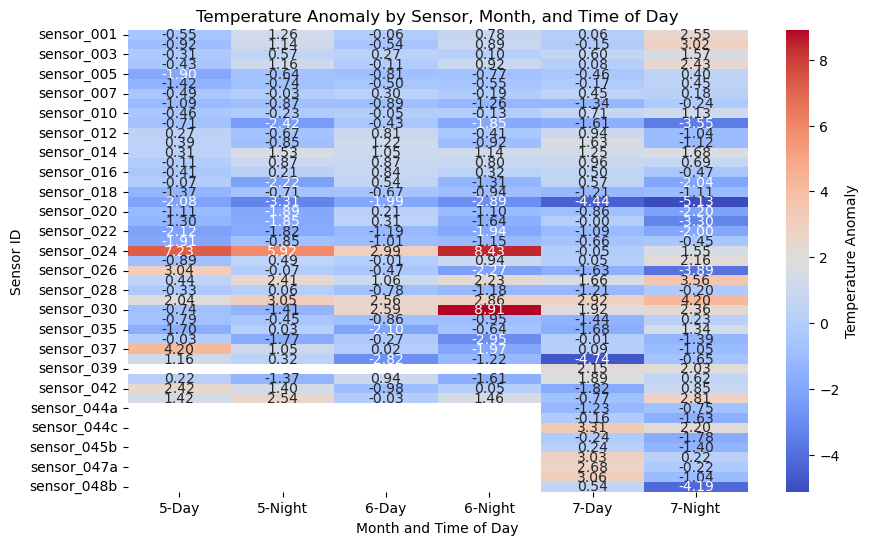

In [28]:
# Anomoly plot 
# Create a heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(anomaly_data.pivot_table(values='temperature_anomaly', index='ID', columns=['month', 'Time of Day']), cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Temperature Anomaly'})

# Set plot labels and title
plt.xlabel('Month and Time of Day')
plt.ylabel('Sensor ID')
plt.title('Temperature Anomaly by Sensor, Month, and Time of Day')

# Show the plot
plt.show()

In [ ]:
# Get all unique values in the 'Sensor_ID' column
unique_sensors = anomaly_data['ID'].unique()

# Print the unique sensor IDs
for sensor_id in unique_sensors:
    print(sensor_id)